In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [6]:
def display_some_example(examples, labels):
    plt.figure(figsize=(8, 8))

    for i in range(25):
        index = np.random.randint(0, examples.shape[0]-1)
        img = examples[index]
        label = labels[index]

        plt.subplot(5, 5, i+1)
        plt.title(str(label))
        plt.tight_layout()
        plt.imshow(img, cmap='gray')
    plt.show()

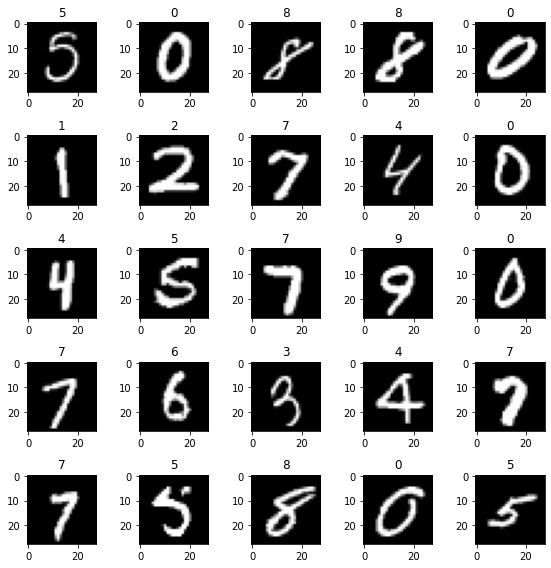

In [7]:
display_some_example(X_train,y_train)

### CNN  model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.GlobalAvgPool2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(X_train, y_train, batch_size=64, epochs=3, validation_split=0.2)
model.evaluate(X_test, y_test, batch_size=64)

Epoch 1/3
750/750 [==============================] - 65s 86ms/step - loss: 0.2339 - accuracy: 0.9377 - val_loss: 0.0879 - val_accuracy: 0.9768
Epoch 2/3
750/750 [==============================] - 56s 74ms/step - loss: 0.0559 - accuracy: 0.9829 - val_loss: 0.1260 - val_accuracy: 0.9582
Epoch 3/3
157/157 [==============================] - 4s 23ms/step - loss: 0.0599 - accuracy: 0.9816


[0.05990118905901909, 0.9815999865531921]

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0

### Web-Application of this Model

In [10]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


'C:\Users\GEETHU' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
import gradio as gr

In [12]:
def predict_img(img):
    img_3d=img.reshape(-1,28,28,1)
    img_norm=img_3d.astype('float32')/255
    prediction=model.predict(img_norm)
    pred=np.argmax(prediction)
    return pred

In [13]:
iface=gr.Interface(predict_img,inputs="sketchpad",outputs="label")

In [ ]:
iface.launch(debug='True')

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
